<a href="https://colab.research.google.com/github/briagrhm/Amazon_Vine_Analysis/blob/main/SARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import packages
import plotly.express as px
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving Combined_Salescsv.csv to Combined_Salescsv.csv


In [11]:
# Read in the data
import io
df=pd.read_csv(io.BytesIO(uploaded['Combined_Salescsv.csv']))
print(df)

     Cat No     Date  Sales
0   14-1048   1/1/23    115
1   14-1048   2/1/23    137
2   14-1048   3/3/23    137
3   14-1048   4/1/23    134
4   14-1048   5/1/23    134
5   14-1048   6/1/23    167
6   14-1048   7/1/23    105
7   14-1048   8/1/23    129
8   14-1048   9/1/23    124
9   14-1048  10/1/23    139
10  14-1048  11/1/23    122
11  14-1048  12/1/23    161
12  14-1048   1/1/24    138
13  14-1048   2/1/24    112
14  14-1048   3/1/24    114
15  14-1048   4/1/24    149
16  14-1048   5/1/24    131
17  14-1048   6/1/24    121
18  14-1048   7/1/24    129
19  14-1048   8/1/24    121
20  14-1048   9/1/24    137
21  14-1048  10/1/24    138
22  14-1048  11/1/24    112
23  14-1048  12/1/24    100


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-13-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
data = df.drop(columns='Cat No')
#df_new.sort_index(inplace=True)
data

,Date,Sales
0,2023-01-01,115
1,2023-02-01,137
2,2023-03-03,137
3,2023-04-01,134
4,2023-05-01,134
5,2023-06-01,167
6,2023-07-01,105
7,2023-08-01,129
8,2023-09-01,124
9,2023-10-01,139


In [15]:
#Plot Data
def plot_sales_volumes(df: pd.DataFrame,
                           y: str) -> None:
    """General function to plot the sales data."""

    fig = px.line(df, x='Date', y=y, labels='Date')
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='Company Sales',
                      width=650, title_x=0.5, height=400)

    return fig.show()


# Plot the Sales data
plot_sales_volumes(df=data, y='Sales')

In [16]:
# Import packages
from scipy.stats import boxcox

# Make the data stationary
data['Sales_Boxcox'], lam = boxcox(data['Sales'])
data["Sales_diff"] = data["Sales_Boxcox"].diff()
data.dropna(inplace=True)

# Plot the stationary Sales data
plot_sales_volumes(df=data, y='Sales_diff')

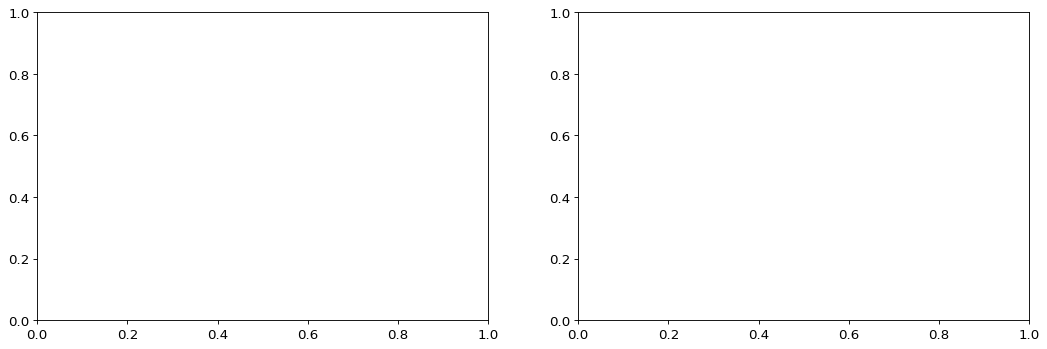

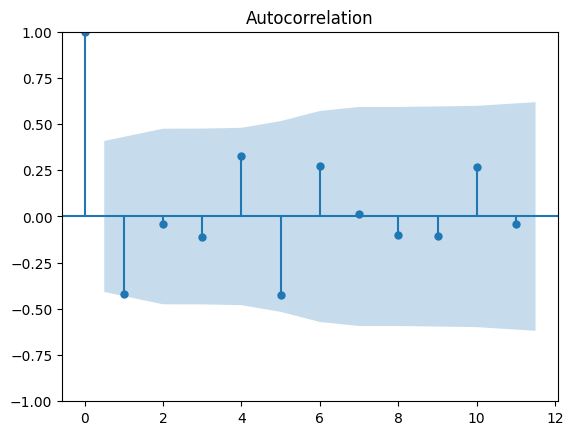

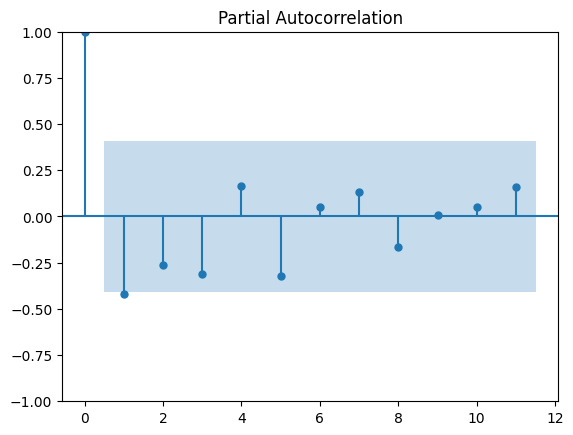

In [17]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot acf and pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data['Sales_diff'])
plot_pacf(data['Sales_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [19]:
# Import packages
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build ARIMA model
model = ARIMA(train['Sales_Boxcox'], order=(10, 1, 10),
              seasonal_order=(1, 1, 1, 12)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/pyt

In [21]:
# Import packages
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Date'], y=train['Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Date'], y=test['Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Date'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Sales')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'SARIMA')